## Simple Index Blending using Synthetic Time Series Endpoint

In this example we will use the Synthetic Time Series endpoint to create a synthetic time series based on two underlyings related by a formula. In our case we will the IBoxx EUR Bond Index and the Stoxx50 Total Return Index and create an index using a 60% IBoxx and 40% Stoxx weighting. In order to do this we will use the endpoint_request function of delivery layer of the Data Library. 

#### Learn more

To learn more about the Data Library for Python please join the LSEG Developer Community. By [registering](https://developers.lseg.com/iam/register) and [logging](https://developers.lseg.com/content/devportal/en_us/initCookie.html) into the LSEG Developer Community portal you will have free access to a number of learning materials like 
 [Quick Start guides](https://developers.lseg.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/quick-start), 
 [Tutorials](https://developers.lseg.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/learning), 
 [Documentation](https://developers.lseg.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/docs)
 and much more.

#### Getting Help and Support

If you have any questions regarding using the API, please post them on 
this [Q&A Forum](https://community.developers.refinitiv.com/spaces/321/index.html). 
The LSEG Developer Community will be happy to help. 

----

### Imports

In [1]:
import refinitiv.data as rd
import pandas as pd
from refinitiv.data.delivery import endpoint_request

### Open Session

In [2]:
rd.open_session()

<refinitiv.data.session.Definition object at 0x115d0bc10 {name='workspace'}>

### Build Request Definition

In [3]:
request_definition = rd.delivery.endpoint_request.Definition(
    method = rd.delivery.endpoint_request.RequestMethod.POST,
    url = 'https://api.refinitiv.com/data/quantitative-analytics/v1/synthetic-time-series',
    body_parameters = {
    "universe": [
        {
            "syntheticTimeSeriesDefinition": {
                "instrumentTag": "EU_BondEquity",
                "formula": "(0.6*RIC1) / (0.4*RIC2)",
                "formulaParameters": [
                    {
                        "name": "RIC1",
                        "fieldName": "TRTN_PRICE",
                        "instrumentCode": ".IBBEU007B"
                    },
                    {
                        "name": "RIC2",
                        "fieldName": "TRDPRC_1",
                        "instrumentCode": ".SX5GR"
                    }
                ]
            },
            "syntheticTimeSeriesParameters": {
                "calendarCode":"EMU",#Zero, Daily, Hourly
                "customFrequency":"1D",
                "frequency": "Custom",
                "enddate": "2024-3-31",
                "startdate": "2024-01-01",
                "missingDataProcessing": "Skip",
            }
        }
    ],
    "fields": [
        "InstrumentTag",
        "Name",
        "Currency",
        "StartDate",
        "EndDate",
        "DataPointCount",
        "Min",
        "Max",
        "Median",
        "UpperQuartile",
        "LowerQuartile",
        "TimeSeriesArray",
        "ErrorMessage",
        "ErrorCode"
    ],
    "outputs": [
        "Headers",
        "Data"
    ]
}
)
response = request_definition.get_data()
#response.data.raw

### Prepare DataFrame from raw JSON response

The delivery layer only outputs raw JSON - unlike the Access or Content layer functions which can output dataframes directly - so we need to generate a dataframe from the JSON response. 

In [4]:
df = pd.DataFrame(response.data.raw['data'])
df.columns = [col['name'] for col in response.data.raw['headers']]
df = df.replace('NaN', pd.NA)
df.dropna(inplace=True)
df

,InstrumentTag,Name,Currency,StartDate,EndDate,DataPointCount,Min,Max,Median,UpperQuartile,LowerQuartile,TimeSeriesArray,ErrorMessage,ErrorCode
1,EU_BondEquity,IBX EUR EUROZONE;STXE 50 GRT,EUR;EUR,2024-01-02T00:00:00Z,2024-01-02T00:00:00Z,2,0.162784,0.162784,0.162784,0.162784,0.162784,"[[Date, InstrumentCode, FieldCode, FieldValue]...",,
2,EU_BondEquity,IBX EUR EUROZONE;STXE 50 GRT,EUR;EUR,2024-01-03T00:00:00Z,2024-01-03T00:00:00Z,2,0.163428,0.163428,0.163428,0.163428,0.163428,"[[Date, InstrumentCode, FieldCode, FieldValue]...",,
3,EU_BondEquity,IBX EUR EUROZONE;STXE 50 GRT,EUR;EUR,2024-01-04T00:00:00Z,2024-01-04T00:00:00Z,2,0.161349,0.161349,0.161349,0.161349,0.161349,"[[Date, InstrumentCode, FieldCode, FieldValue]...",,
4,EU_BondEquity,IBX EUR EUROZONE;STXE 50 GRT,EUR;EUR,2024-01-05T00:00:00Z,2024-01-05T00:00:00Z,2,0.161535,0.161535,0.161535,0.161535,0.161535,"[[Date, InstrumentCode, FieldCode, FieldValue]...",,
7,EU_BondEquity,IBX EUR EUROZONE;STXE 50 GRT,EUR;EUR,2024-01-08T00:00:00Z,2024-01-08T00:00:00Z,2,0.161334,0.161334,0.161334,0.161334,0.161334,"[[Date, InstrumentCode, FieldCode, FieldValue]...",,
8,EU_BondEquity,IBX EUR EUROZONE;STXE 50 GRT,EUR;EUR,2024-01-09T00:00:00Z,2024-01-09T00:00:00Z,2,0.16105,0.16105,0.16105,0.16105,0.16105,"[[Date, InstrumentCode, FieldCode, FieldValue]...",,
9,EU_BondEquity,IBX EUR EUROZONE;STXE 50 GRT,EUR;EUR,2024-01-10T00:00:00Z,2024-01-10T00:00:00Z,2,0.161005,0.161005,0.161005,0.161005,0.161005,"[[Date, InstrumentCode, FieldCode, FieldValue]...",,
10,EU_BondEquity,IBX EUR EUROZONE;STXE 50 GRT,EUR;EUR,2024-01-11T00:00:00Z,2024-01-11T00:00:00Z,2,0.162411,0.162411,0.162411,0.162411,0.162411,"[[Date, InstrumentCode, FieldCode, FieldValue]...",,
11,EU_BondEquity,IBX EUR EUROZONE;STXE 50 GRT,EUR;EUR,2024-01-12T00:00:00Z,2024-01-12T00:00:00Z,2,0.161666,0.161666,0.161666,0.161666,0.161666,"[[Date, InstrumentCode, FieldCode, FieldValue]...",,
14,EU_BondEquity,IBX EUR EUROZONE;STXE 50 GRT,EUR;EUR,2024-01-15T00:00:00Z,2024-01-15T00:00:00Z,2,0.16211,0.16211,0.16211,0.16211,0.16211,"[[Date, InstrumentCode, FieldCode, FieldValue]...",,


### Plotting the Synthetic Time Series

We just use the built-in pandas plotting capability.

<Axes: >

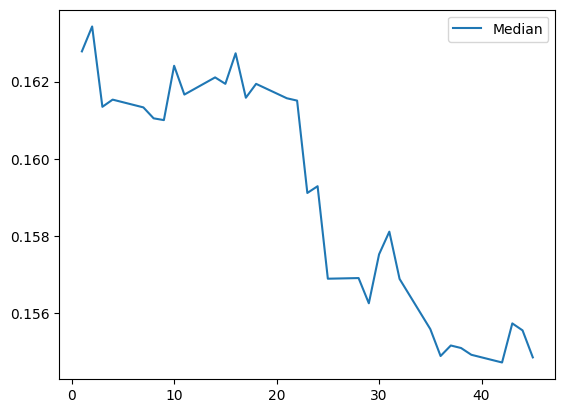

In [5]:
df[['StartDate','Median']].plot(kind='line')

### Close the session

In [11]:
rd.close_session()